In [1]:
import os
os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Leveraged Debt', min_assets=.01, max_expense=1.2)
equities = screen_funds('Equities', 'Leveraged Equity', min_assets=.01, max_expense=1.2)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

4 54
from 2019-05-21 to 2019-07-10 - 58


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

56


,len,mean,std,shrp,yield,drawdown
symbol,,,,,,
RUSL,30,5.209468,3.974967,1.300586,37.428265,3.622917
BRZU,30,7.842171,8.397344,0.929162,69.644476,7.584735
LBJ,30,5.279612,5.705616,0.918381,40.109360,7.747036
GDXX,30,7.802361,8.807263,0.881395,57.205359,12.049794
NUGT,30,11.799086,13.648602,0.861583,92.633763,17.409012
JNUG,30,11.254523,15.104218,0.742497,86.627737,18.740157
EET,30,2.321720,3.234657,0.705496,12.412444,4.599513
EDC,30,3.484071,4.898065,0.703214,18.671066,6.267736
TYD,30,1.205245,1.801103,0.647138,8.852067,2.631068


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted UYM 0.798 -0.311
evicted DFEN 0.680 -0.239
evicted CHAU 0.587 -0.047
evicted LABU 0.538 -0.264
evicted USD 0.747 -0.495
evicted JNUG 0.493 -0.305
evicted BRZU 0.351 -0.350
retry backlogs ['MIDU', 'GDXX', 'UPRO', 'MVV', 'TNA', 'LBJ', 'SSO', 'UYG', 'EDC', 'DRN', 'UWM', 'UMDD', 'URTY', 'SAA', 'FAS', 'QLD', 'TQQQ', 'DIG', 'SPXL', 'TYD', 'TMF', 'UBIO', 'EURL', 'CURE', 'UDOW', 'EET', 'XPP', 'RXL', 'UXI', 'PPLC', 'DZK', 'URE', 'TECL', 'ROM', 'UPW', 'SOXL', 'DDM', 'JPNL', 'UST', 'RETL', 'NUGT', 'BIB', 'YINN', 'ERX', 'INDL', 'FINU'] at 0.805/-0.51 - 1.712
evicted YINN 0.634 0.049
evicted BIB 0.678 -0.258
evicted SOXL 0.624 -0.459
evicted GDXX 0.530 -0.223
evicted LBJ 0.467 -0.126
retry backlogs ['UPRO', 'UXI', 'SSO', 'QLD', 'TQQQ', 'UYG', 'DIG', 'UST', 'UMDD', 'SAA', 'FINU', 'MIDU', 'URE', 'PPLC', 'RXL', 'DDM', 'UBT', 'DZK', 'XPP', 'EET', 'URTY', 'UWM', 'SPXL', 'CURE', 'UBIO', 'TNA', 'MVV', 'UDOW', 'TECL', 'ROM', 'DRN', 'UPW', 'NUGT', 'EDC', 'EURL', 'JPNL', 'TYD', 'ERX', 'RETL', 'INDL']

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,2.872143,1.630069,-0.170820,1.773986,2.826647,3.905718,6.261503,1.737632,19.161706,1.949266
RUSL,30.0,5.209468,3.974967,-1.026472,1.649172,5.409617,8.245945,12.665445,1.300586,37.428265,3.622917
UBT,30.0,1.528156,2.530650,-2.940423,0.020624,0.866664,2.596039,7.829603,0.588178,10.663650,3.532740
FINU,30.0,2.401232,5.953724,-7.435135,-0.781127,1.882125,5.437059,13.757480,0.396651,8.878245,12.579101


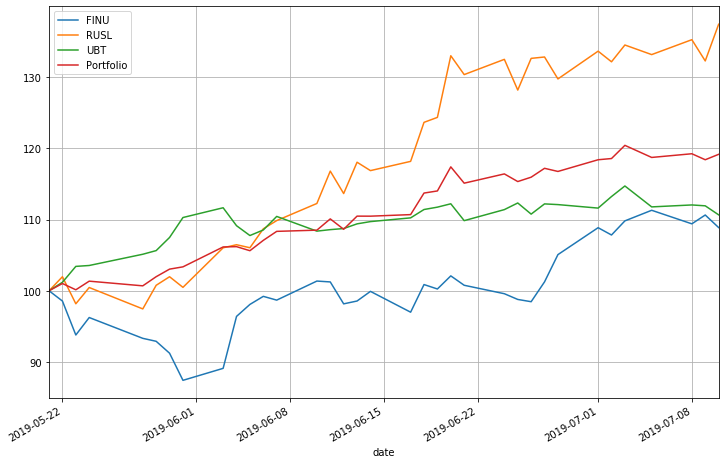

In [11]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.1, backlogs_pos_threshold=.8)
quote.setup_mask({'FINU', 'UBT', 'RUSL'})
sd.update(quote.optimize_portfolio(.1))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(.1))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote2 = Quote(['TMF', 'SPXL'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)

In [ ]:
quote2 = Quote(['UBT', 'SSO'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)